# Image Similarity based on pretrained VGG-16

# 0. Imports

In [1]:
import cv2
import os
import glob
import random
import numpy as np
from numpy import linalg as LA
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from matplotlib import pyplot as plt
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

Using TensorFlow backend.


# 1. Definitions

In [2]:
class VGG16SignatureExtractor:
    """
    A simple VGG16 based Similarity Signature Extractor for Images.
    """    
    
    def __init__(self):    
        self.input_shape = (224, 224, 3)
        self.weight = 'imagenet'
        self.pooling = 'max'
        # Load pretrained VGG16 weights
        self.model = VGG16(weights = self.weight, input_shape = (self.input_shape[0], self.input_shape[1], self.input_shape[2]), pooling = self.pooling, include_top = False)
        self.model.predict(np.zeros((1, 224, 224 , 3)))

    def extract_signature(self, img_path):
        """
        Applies the pretrained VGG16 architecture to the given image and returns the output
        of the last convolution layer as a signature
        """
        img = image.load_img(img_path, target_size=(self.input_shape[0], self.input_shape[1]))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        signature = self.model.predict(img)
        norm_signature = signature[0]/LA.norm(signature[0])
        return norm_signature

def get_images_and_signatures(path_to_images, f_type='.png', n_pix_w=224, n_pix_h=224):
    """
    Load all images found under the given path and extract signatures using a pretrained VGG16 architecture.
    """
    signatures = []
    names = []
    data=[]

    data_path = os.path.join(path_to_images,'**/*' + f_type)
    img_list = glob.glob(data_path, recursive=True)
    
    model = VGG16SignatureExtractor()
    for i, img_path in enumerate(img_list):
        img = cv2.imread(img_path)
        img_name = os.path.split(img_path)[1]
        norm_signature = model.extract_signature(img_path)
        signatures.append(norm_signature)
        names.append(img_name)
        img = cv2.resize(img, (n_pix_w, n_pix_h))
        data.append(img)
        print("Extracting signature from image No. %d , %d images in total" %((i+1), len(img_list)))
    signatures = np.array(signatures)
    return data, signatures

def get_k_closest(query_image, image_search_space, k):
    """
    Get the k images from the image_search_space with the smallest cosine distance to the query image
    """
    dists = np.array([spatial.distance.cosine(query_image, img) for img in image_search_space])
    idx_closest = dists.argsort()[:k]
    return dists[idx_closest], idx_closest

def plot_similar_images(query_image, image_search_space, sim_image_idx, sim_image_dist):
    """
    Plot the query image and the images from the image_search_space that are listed in sim_image_idx
    """
    k = len(sim_image_idx)
    fig1 = plt.figure(num=3, figsize=(15, 4*k+2))
    fig1.add_subplot(k+1, 2, 1)
    plt.imshow(query_image)
    plt.title('Query image')
    for i, img in enumerate(sim_image_idx):
        fig1.add_subplot(k+1, 2, i*2+2)
        plt.imshow(image_list_data[img])
        plt.title('Image '+str(img)+' (Distance: '+str(sim_image_dist[i])+')')

# 2. Load images & extract signatures

In [3]:
filepath_train='/lhome/rbaldau/data/cv1_images/train/'
filepath_val='/lhome/rbaldau/data/cv1_images/val/'

data_train, sig_train = get_images_and_signatures(filepath_train, n_pix_h=128, n_pix_w=256)
data_val, sig_val = get_images_and_signatures(filepath_val, n_pix_h=128, n_pix_w=256)

Extracting signature from image No. 1 , 1120 images in total
Extracting signature from image No. 2 , 1120 images in total
Extracting signature from image No. 3 , 1120 images in total
Extracting signature from image No. 4 , 1120 images in total
Extracting signature from image No. 5 , 1120 images in total
Extracting signature from image No. 6 , 1120 images in total
Extracting signature from image No. 7 , 1120 images in total
Extracting signature from image No. 8 , 1120 images in total
Extracting signature from image No. 9 , 1120 images in total
Extracting signature from image No. 10 , 1120 images in total
Extracting signature from image No. 11 , 1120 images in total
Extracting signature from image No. 12 , 1120 images in total
Extracting signature from image No. 13 , 1120 images in total
Extracting signature from image No. 14 , 1120 images in total
Extracting signature from image No. 15 , 1120 images in total
Extracting signature from image No. 16 , 1120 images in total
Extracting signat

Extracting signature from image No. 133 , 1120 images in total
Extracting signature from image No. 134 , 1120 images in total
Extracting signature from image No. 135 , 1120 images in total
Extracting signature from image No. 136 , 1120 images in total
Extracting signature from image No. 137 , 1120 images in total
Extracting signature from image No. 138 , 1120 images in total
Extracting signature from image No. 139 , 1120 images in total
Extracting signature from image No. 140 , 1120 images in total
Extracting signature from image No. 141 , 1120 images in total
Extracting signature from image No. 142 , 1120 images in total
Extracting signature from image No. 143 , 1120 images in total
Extracting signature from image No. 144 , 1120 images in total
Extracting signature from image No. 145 , 1120 images in total
Extracting signature from image No. 146 , 1120 images in total
Extracting signature from image No. 147 , 1120 images in total
Extracting signature from image No. 148 , 1120 images i

Extracting signature from image No. 264 , 1120 images in total
Extracting signature from image No. 265 , 1120 images in total
Extracting signature from image No. 266 , 1120 images in total
Extracting signature from image No. 267 , 1120 images in total
Extracting signature from image No. 268 , 1120 images in total
Extracting signature from image No. 269 , 1120 images in total
Extracting signature from image No. 270 , 1120 images in total
Extracting signature from image No. 271 , 1120 images in total
Extracting signature from image No. 272 , 1120 images in total
Extracting signature from image No. 273 , 1120 images in total
Extracting signature from image No. 274 , 1120 images in total
Extracting signature from image No. 275 , 1120 images in total
Extracting signature from image No. 276 , 1120 images in total
Extracting signature from image No. 277 , 1120 images in total
Extracting signature from image No. 278 , 1120 images in total
Extracting signature from image No. 279 , 1120 images i

Extracting signature from image No. 395 , 1120 images in total
Extracting signature from image No. 396 , 1120 images in total
Extracting signature from image No. 397 , 1120 images in total
Extracting signature from image No. 398 , 1120 images in total
Extracting signature from image No. 399 , 1120 images in total
Extracting signature from image No. 400 , 1120 images in total
Extracting signature from image No. 401 , 1120 images in total
Extracting signature from image No. 402 , 1120 images in total
Extracting signature from image No. 403 , 1120 images in total
Extracting signature from image No. 404 , 1120 images in total
Extracting signature from image No. 405 , 1120 images in total
Extracting signature from image No. 406 , 1120 images in total
Extracting signature from image No. 407 , 1120 images in total
Extracting signature from image No. 408 , 1120 images in total
Extracting signature from image No. 409 , 1120 images in total
Extracting signature from image No. 410 , 1120 images i

Extracting signature from image No. 526 , 1120 images in total
Extracting signature from image No. 527 , 1120 images in total
Extracting signature from image No. 528 , 1120 images in total
Extracting signature from image No. 529 , 1120 images in total
Extracting signature from image No. 530 , 1120 images in total
Extracting signature from image No. 531 , 1120 images in total
Extracting signature from image No. 532 , 1120 images in total
Extracting signature from image No. 533 , 1120 images in total
Extracting signature from image No. 534 , 1120 images in total
Extracting signature from image No. 535 , 1120 images in total
Extracting signature from image No. 536 , 1120 images in total
Extracting signature from image No. 537 , 1120 images in total
Extracting signature from image No. 538 , 1120 images in total
Extracting signature from image No. 539 , 1120 images in total
Extracting signature from image No. 540 , 1120 images in total
Extracting signature from image No. 541 , 1120 images i

Extracting signature from image No. 657 , 1120 images in total
Extracting signature from image No. 658 , 1120 images in total
Extracting signature from image No. 659 , 1120 images in total
Extracting signature from image No. 660 , 1120 images in total
Extracting signature from image No. 661 , 1120 images in total
Extracting signature from image No. 662 , 1120 images in total
Extracting signature from image No. 663 , 1120 images in total
Extracting signature from image No. 664 , 1120 images in total
Extracting signature from image No. 665 , 1120 images in total
Extracting signature from image No. 666 , 1120 images in total
Extracting signature from image No. 667 , 1120 images in total
Extracting signature from image No. 668 , 1120 images in total
Extracting signature from image No. 669 , 1120 images in total
Extracting signature from image No. 670 , 1120 images in total
Extracting signature from image No. 671 , 1120 images in total
Extracting signature from image No. 672 , 1120 images i

Extracting signature from image No. 788 , 1120 images in total
Extracting signature from image No. 789 , 1120 images in total
Extracting signature from image No. 790 , 1120 images in total
Extracting signature from image No. 791 , 1120 images in total
Extracting signature from image No. 792 , 1120 images in total
Extracting signature from image No. 793 , 1120 images in total
Extracting signature from image No. 794 , 1120 images in total
Extracting signature from image No. 795 , 1120 images in total
Extracting signature from image No. 796 , 1120 images in total
Extracting signature from image No. 797 , 1120 images in total
Extracting signature from image No. 798 , 1120 images in total
Extracting signature from image No. 799 , 1120 images in total
Extracting signature from image No. 800 , 1120 images in total
Extracting signature from image No. 801 , 1120 images in total
Extracting signature from image No. 802 , 1120 images in total
Extracting signature from image No. 803 , 1120 images i

Extracting signature from image No. 919 , 1120 images in total
Extracting signature from image No. 920 , 1120 images in total
Extracting signature from image No. 921 , 1120 images in total
Extracting signature from image No. 922 , 1120 images in total
Extracting signature from image No. 923 , 1120 images in total
Extracting signature from image No. 924 , 1120 images in total
Extracting signature from image No. 925 , 1120 images in total
Extracting signature from image No. 926 , 1120 images in total
Extracting signature from image No. 927 , 1120 images in total
Extracting signature from image No. 928 , 1120 images in total
Extracting signature from image No. 929 , 1120 images in total
Extracting signature from image No. 930 , 1120 images in total
Extracting signature from image No. 931 , 1120 images in total
Extracting signature from image No. 932 , 1120 images in total
Extracting signature from image No. 933 , 1120 images in total
Extracting signature from image No. 934 , 1120 images i

Extracting signature from image No. 1049 , 1120 images in total
Extracting signature from image No. 1050 , 1120 images in total
Extracting signature from image No. 1051 , 1120 images in total
Extracting signature from image No. 1052 , 1120 images in total
Extracting signature from image No. 1053 , 1120 images in total
Extracting signature from image No. 1054 , 1120 images in total
Extracting signature from image No. 1055 , 1120 images in total
Extracting signature from image No. 1056 , 1120 images in total
Extracting signature from image No. 1057 , 1120 images in total
Extracting signature from image No. 1058 , 1120 images in total
Extracting signature from image No. 1059 , 1120 images in total
Extracting signature from image No. 1060 , 1120 images in total
Extracting signature from image No. 1061 , 1120 images in total
Extracting signature from image No. 1062 , 1120 images in total
Extracting signature from image No. 1063 , 1120 images in total
Extracting signature from image No. 1064

Extracting signature from image No. 59 , 1007 images in total
Extracting signature from image No. 60 , 1007 images in total
Extracting signature from image No. 61 , 1007 images in total
Extracting signature from image No. 62 , 1007 images in total
Extracting signature from image No. 63 , 1007 images in total
Extracting signature from image No. 64 , 1007 images in total
Extracting signature from image No. 65 , 1007 images in total
Extracting signature from image No. 66 , 1007 images in total
Extracting signature from image No. 67 , 1007 images in total
Extracting signature from image No. 68 , 1007 images in total
Extracting signature from image No. 69 , 1007 images in total
Extracting signature from image No. 70 , 1007 images in total
Extracting signature from image No. 71 , 1007 images in total
Extracting signature from image No. 72 , 1007 images in total
Extracting signature from image No. 73 , 1007 images in total
Extracting signature from image No. 74 , 1007 images in total
Extracti

Extracting signature from image No. 190 , 1007 images in total
Extracting signature from image No. 191 , 1007 images in total
Extracting signature from image No. 192 , 1007 images in total
Extracting signature from image No. 193 , 1007 images in total
Extracting signature from image No. 194 , 1007 images in total
Extracting signature from image No. 195 , 1007 images in total
Extracting signature from image No. 196 , 1007 images in total
Extracting signature from image No. 197 , 1007 images in total
Extracting signature from image No. 198 , 1007 images in total
Extracting signature from image No. 199 , 1007 images in total
Extracting signature from image No. 200 , 1007 images in total
Extracting signature from image No. 201 , 1007 images in total
Extracting signature from image No. 202 , 1007 images in total
Extracting signature from image No. 203 , 1007 images in total
Extracting signature from image No. 204 , 1007 images in total
Extracting signature from image No. 205 , 1007 images i

Extracting signature from image No. 321 , 1007 images in total
Extracting signature from image No. 322 , 1007 images in total
Extracting signature from image No. 323 , 1007 images in total
Extracting signature from image No. 324 , 1007 images in total
Extracting signature from image No. 325 , 1007 images in total
Extracting signature from image No. 326 , 1007 images in total
Extracting signature from image No. 327 , 1007 images in total
Extracting signature from image No. 328 , 1007 images in total
Extracting signature from image No. 329 , 1007 images in total
Extracting signature from image No. 330 , 1007 images in total
Extracting signature from image No. 331 , 1007 images in total
Extracting signature from image No. 332 , 1007 images in total
Extracting signature from image No. 333 , 1007 images in total
Extracting signature from image No. 334 , 1007 images in total
Extracting signature from image No. 335 , 1007 images in total
Extracting signature from image No. 336 , 1007 images i

Extracting signature from image No. 452 , 1007 images in total
Extracting signature from image No. 453 , 1007 images in total
Extracting signature from image No. 454 , 1007 images in total
Extracting signature from image No. 455 , 1007 images in total
Extracting signature from image No. 456 , 1007 images in total
Extracting signature from image No. 457 , 1007 images in total
Extracting signature from image No. 458 , 1007 images in total
Extracting signature from image No. 459 , 1007 images in total
Extracting signature from image No. 460 , 1007 images in total
Extracting signature from image No. 461 , 1007 images in total
Extracting signature from image No. 462 , 1007 images in total
Extracting signature from image No. 463 , 1007 images in total
Extracting signature from image No. 464 , 1007 images in total
Extracting signature from image No. 465 , 1007 images in total
Extracting signature from image No. 466 , 1007 images in total
Extracting signature from image No. 467 , 1007 images i

Extracting signature from image No. 583 , 1007 images in total
Extracting signature from image No. 584 , 1007 images in total
Extracting signature from image No. 585 , 1007 images in total
Extracting signature from image No. 586 , 1007 images in total
Extracting signature from image No. 587 , 1007 images in total
Extracting signature from image No. 588 , 1007 images in total
Extracting signature from image No. 589 , 1007 images in total
Extracting signature from image No. 590 , 1007 images in total
Extracting signature from image No. 591 , 1007 images in total
Extracting signature from image No. 592 , 1007 images in total
Extracting signature from image No. 593 , 1007 images in total
Extracting signature from image No. 594 , 1007 images in total
Extracting signature from image No. 595 , 1007 images in total
Extracting signature from image No. 596 , 1007 images in total
Extracting signature from image No. 597 , 1007 images in total
Extracting signature from image No. 598 , 1007 images i

Extracting signature from image No. 714 , 1007 images in total
Extracting signature from image No. 715 , 1007 images in total
Extracting signature from image No. 716 , 1007 images in total
Extracting signature from image No. 717 , 1007 images in total
Extracting signature from image No. 718 , 1007 images in total
Extracting signature from image No. 719 , 1007 images in total
Extracting signature from image No. 720 , 1007 images in total
Extracting signature from image No. 721 , 1007 images in total
Extracting signature from image No. 722 , 1007 images in total
Extracting signature from image No. 723 , 1007 images in total
Extracting signature from image No. 724 , 1007 images in total
Extracting signature from image No. 725 , 1007 images in total
Extracting signature from image No. 726 , 1007 images in total
Extracting signature from image No. 727 , 1007 images in total
Extracting signature from image No. 728 , 1007 images in total
Extracting signature from image No. 729 , 1007 images i

Extracting signature from image No. 845 , 1007 images in total
Extracting signature from image No. 846 , 1007 images in total
Extracting signature from image No. 847 , 1007 images in total
Extracting signature from image No. 848 , 1007 images in total
Extracting signature from image No. 849 , 1007 images in total
Extracting signature from image No. 850 , 1007 images in total
Extracting signature from image No. 851 , 1007 images in total
Extracting signature from image No. 852 , 1007 images in total
Extracting signature from image No. 853 , 1007 images in total
Extracting signature from image No. 854 , 1007 images in total
Extracting signature from image No. 855 , 1007 images in total
Extracting signature from image No. 856 , 1007 images in total
Extracting signature from image No. 857 , 1007 images in total
Extracting signature from image No. 858 , 1007 images in total
Extracting signature from image No. 859 , 1007 images in total
Extracting signature from image No. 860 , 1007 images i

Extracting signature from image No. 976 , 1007 images in total
Extracting signature from image No. 977 , 1007 images in total
Extracting signature from image No. 978 , 1007 images in total
Extracting signature from image No. 979 , 1007 images in total
Extracting signature from image No. 980 , 1007 images in total
Extracting signature from image No. 981 , 1007 images in total
Extracting signature from image No. 982 , 1007 images in total
Extracting signature from image No. 983 , 1007 images in total
Extracting signature from image No. 984 , 1007 images in total
Extracting signature from image No. 985 , 1007 images in total
Extracting signature from image No. 986 , 1007 images in total
Extracting signature from image No. 987 , 1007 images in total
Extracting signature from image No. 988 , 1007 images in total
Extracting signature from image No. 989 , 1007 images in total
Extracting signature from image No. 990 , 1007 images in total
Extracting signature from image No. 991 , 1007 images i


# 3. Find similar images by signature

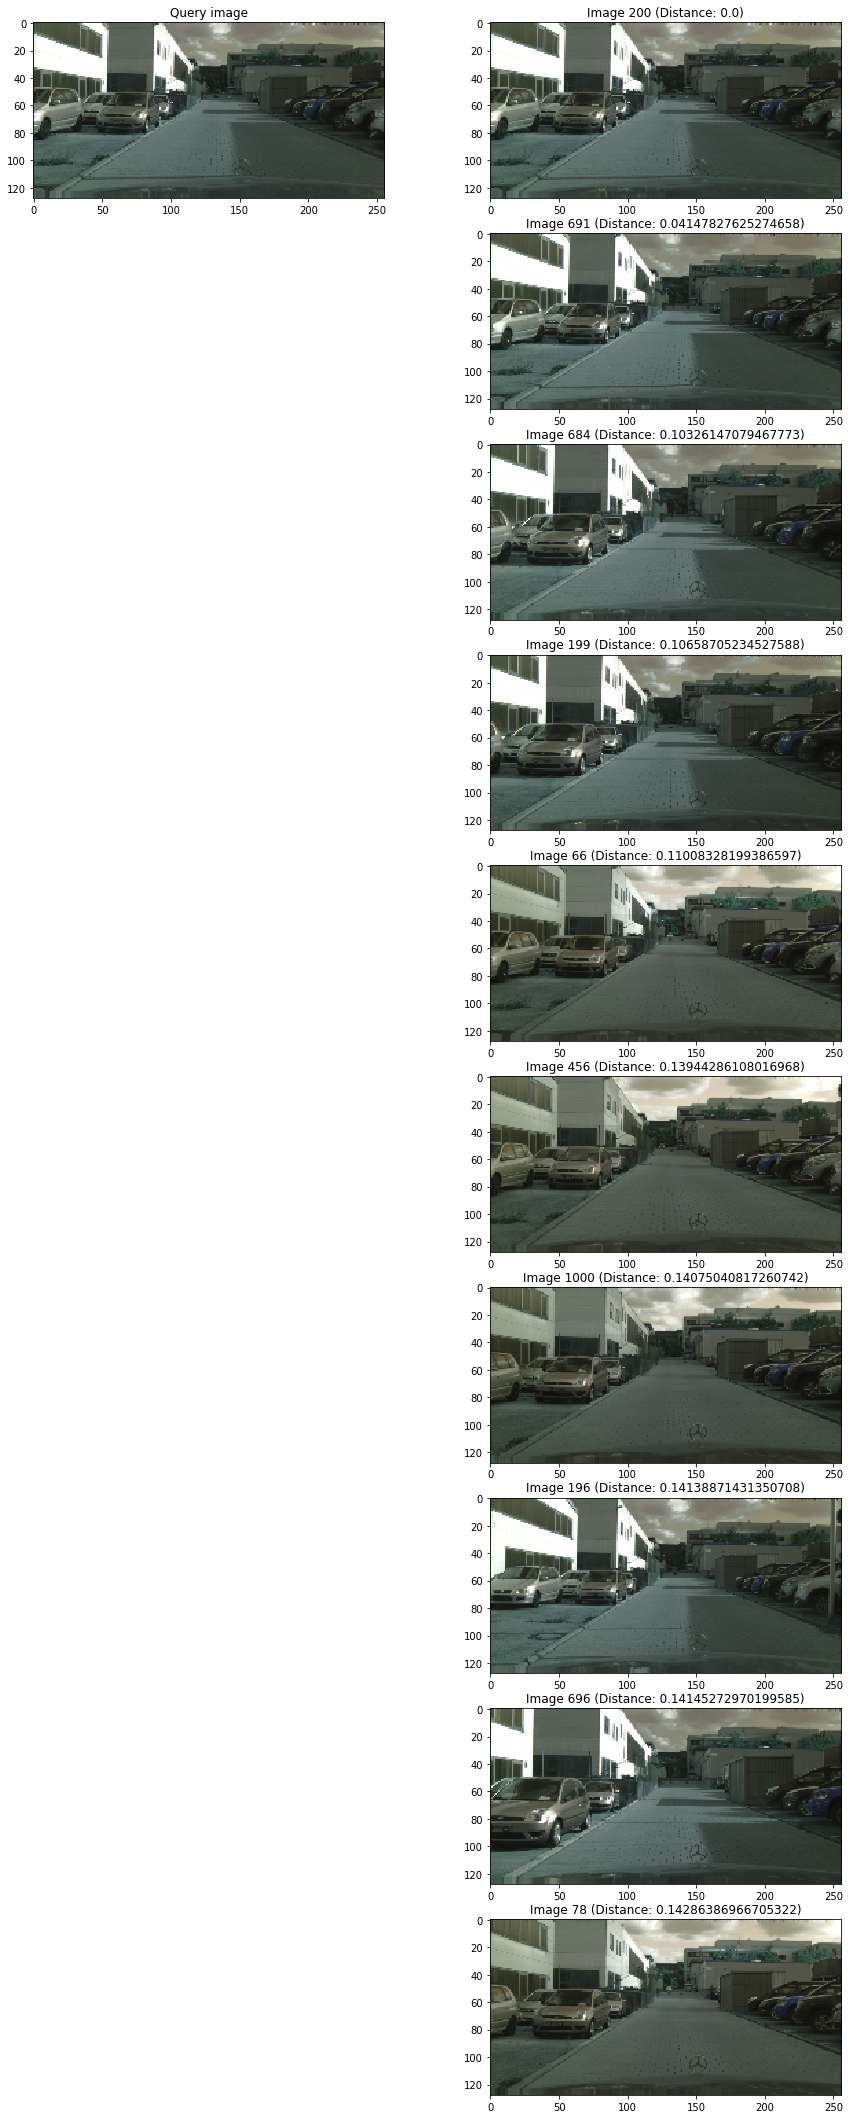

In [5]:
k = 10
query_idx = 200
query_image_sig = sig_val[query_idx]
query_image_data = data_val[query_idx]
image_list_sig = sig_val
image_list_data = data_val

sim_image_dist, sim_image_idx = get_k_closest(query_image_sig, image_list_sig, k)
plot_similar_images(query_image_data, image_list_data, sim_image_idx, sim_image_dist)